In [1]:
#-----------------------------------------------------------------------
# original_flow.py
# Author: Rebecca Barber
# 
# simulates the expected revenue given the flow in matt's paper (i.e.
# separate by favorite item). should be O(\sqrt(n)). checking to make
# sure that the code works.
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# ER draws

In [5]:
# draws value from ER curve
def er_draw():
	q = random()
	return 1/(1-q)

# draws d values from the ER curve
def draw_vals(d):
	vals = []
	for i in range(d):
		draw = er_draw()
		vals.append(draw)
	return vals

# Flow Simulation

In [29]:
# simulates flow given n bidders and m items
# essentially just arranging the n*m values and using
# the given mechanism to "star" values
def flow_sim(n, m):
    
    delta = 0.1

	# need to get n*m values
    vals = draw_vals(n*m)
    
    # divide into 2 cols
    col1 = vals[0:n-1]
    col2 = vals[n:len(vals)-1]
    assert len(col1) == len(col2), "columns aren't the same size"
    
    # get largest "unstarred" value in each column
    highest_unstarred_col1 = 0
    highest_unstarred_col2 = 0
    for i in range(len(col1)):
        val_col1 = delta * col1[i]
        val_col2 = delta * col2[i]
        # item "starred" if it is bidder i's favorite
        if val_col1 > val_col2 and val_col2 > highest_unstarred_col2: 
            highest_unstarred_col2 = val_col2
        if val_col2 > val_col1 and val_col1 > highest_unstarred_col1:
            highest_unstarred_col1 = val_col1

    return highest_unstarred_col1 + highest_unstarred_col2

# Variable Updates

In [43]:
num_trials = 100000
min_bidders = 100
max_bidders = 500
bidder_step = 10
num_items = 2

num_bidders = []
for i in range(min_bidders, max_bidders+1, bidder_step):
    num_bidders.append(i)
print(num_bidders)

[100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500]


# Main

In [44]:
avg_revs = []

print('number of bidders:', end = '')
for n in range(min_bidders, max_bidders+1, bidder_step):
    print('  ', n, end = '')

    # run num_trials for each # of bidders so we can 
    # take the average
    all_revs = []
    for i in range(num_trials):
        rev = flow_sim(n, num_items)
        all_revs.append(rev)        
    avg_revs.append(mean(all_revs))

# save all of the data
csv_file = './data/orig_flow' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.csv'

df = pd.DataFrame(columns=['num bidders', 'avg rev'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_rev = avg_revs[i]
    df = df.append({'num bidders': n, 'avg rev': avg_rev}, ignore_index=True)

df.to_csv(csv_file)

number of bidders:   100   110   120   130   140   150   160   170   180   190   200   210   220   230   240   250   260   270   280   290   300   310   320   330   340   350   360   370   380   390   400   410   420   430   440   450   460   470   480   490   500

# Plotting

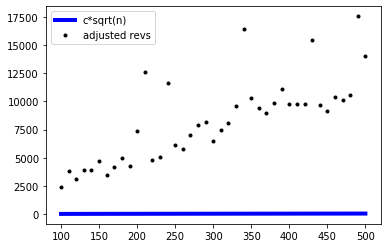

In [45]:
# plot the results
sqrt_bench = [2.5*np.sqrt(n) for n in num_bidders]

plt.plot(num_bidders, sqrt_bench, 'b-',
         num_bidders, avg_revs,'ko', 
         markersize=3, linewidth = 4)
plt.legend(['c*sqrt(n)', 'adjusted revs'])

In [46]:
# For fitting y = A + B log x, just fit y against (log x)
# For fitting y = A + B sqrt n, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), adj_revs, 1, full = True)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), adj_revs, 1, full = True)
print('log fit: \na =', log_fit[0][0], '\nb =', log_fit[0][1], '\nerror =', log_fit[1][0])
print('\nsqrt fit: \na =', sqrt_fit[0][0], '\nb =', sqrt_fit[0][1], '\nerror =', sqrt_fit[1][0])

TypeError: expected x and y to have same length